In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

## Задача 1.  МНК (2 балла).

Ниже приведен код, генерирующий набор данных на python. 
Он описывает процесс измерения термометром температуры печи. 

Text(0, 0.5, 'y (оценка температуры)')

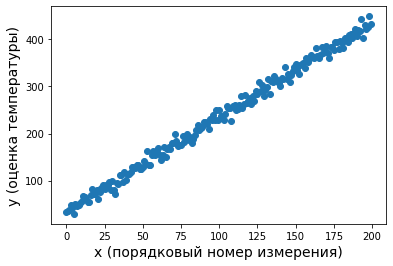

In [3]:
def datasets_make_regression(coef, data_size, noise_sigma, random_state):
    x = np.arange(0, data_size, 1.)
    mu = 0.0
    random.seed(random_state)
    noise = np.empty((data_size, 1))
    y = np.empty((data_size, 1))

    for i in range(data_size):
        noise[i] = random.gauss(mu, noise_sigma)
        y[i] = coef[0] + coef[1]*x[i] + noise[i]

    return x, y

coef_true = [34.2, 2.] # весовые коэффициенты
data_size = 200 # размер генерируемого набора данных
noise_sigma = 10 # СКО шума в данных
random_state = 42
x_scale, y_estimate = datasets_make_regression(coef_true, data_size, noise_sigma, random_state)

plt.plot(x_scale, y_estimate, 'o') 
plt.xlabel('x (порядковый номер измерения)', fontsize=14)
plt.ylabel('y (оценка температуры)', fontsize=14)

Напишите функцию, которая строит уравнение линейной регрессии $y = w_1^*x+w_0^*$ и наносит его на график вместе с данными. Нахождение коэффициентов $w_0^*$ и $w_1^*$ сводится к нахождению экстремума функции двух переменных
$$
Q\left(w_0^*, w_1^*, x\right)=\frac{1}{n} \sum_{i=1}^n\left(w_0^*+w_1^* x_i-y_i\right)^2 .
$$
Решать задачу по следующему алгоритму:
- найти частные производные функции $Q\left(w_0^*, w_1^*, x\right)$ по искомым $w_0^*, w_1^*$;
- приравнять полученные выражения к нулю;
- решить полученную систему из двух уравнений с двумя неизвестными.
Решение полученной системы уравнений и будет являться искомыми параметрами модели.

$$
\frac{\partial Q}{\partial w^*_0} = \frac{2}{n}\sum_{i=1}^n(w_0^*+w_1^* x_i-y_i) = 0
$$

$$
\frac{\partial Q}{\partial w^*_1} = \frac{2}{n}\sum_{i=1}^n(w_0^*+w_1^* x_i-y_i)x_i = 0
$$
Then ($\mu$ = mean)
$$
w_1^*(\mu(x^2) - \mu(x)^2) = \mu(xy) - \mu(x)\mu(y)
$$
$$
w_0^* = \mu(y) - w_1^*\mu(x)
$$

In [6]:
w_1 = (np.mean(x_scale*y_estimate) - np.mean(x_scale)*np.mean(y_estimate))/(np.mean(x_scale**2) - np.mean(x_scale)**2)
w_1

0.0

In [9]:
w_0 = np.mean(y_estimate)
w_0

234.3612962831703

In [12]:
n = data_size

fun = lambda w: np.sum((np.ones(n)*w[0] + w[1]*x_scale - y_estimate)**2)
res = minimize(fun, [0,0])
res

      fun: 544380315.5569909
 hess_inv: array([[ 4.96268705e-05, -3.73134318e-07],
       [-3.73134318e-07,  3.75009333e-09]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([2.34361279e+02, 1.30851099e-07])

## Задача 2. Нелинейные уравнения и системы (2 балла). 

Найдите корни полинома $x^4 + 9 x^2+11 x-20$.
Какую (приблизительно) долю площади на комплексной плоскости от квадрата  $|Rez|<4,  |Imz|<4$ занимает область притяжения наибольшего корня по модулю? Решить перебором точек.  
Можете использовать следующий код:


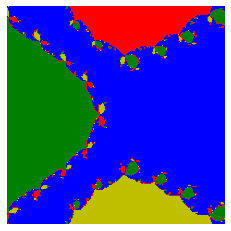

In [2]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# A list of colors to distinguish the roots.
colors = ['b', 'r', 'g', 'y']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    try:
      z = optimize.newton(f, z0, fprime)
      return z
    except:
      return False

def plot_newton_fractal(f, fprime, n=200, domain=(-4, 4, -4, 4)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**4 + 9*z*z + 11*z - 20
fprime = lambda z: 4*z**3 + 18*z + 11

plot_newton_fractal(f, fprime, n=200)

## Задача 3. Разделение переменных с помощью SVD (3 балла).

Рассмотрим функцию  

$$
f(x,y) = 2*x^2*sin(y) + cos(x)*y + e^x*ln(1+y^2)
$$

Постройте для этой функции матрицу значений в квадрате 
$$
х ∈ [-10, 10], y ∈ [-10, 10]
$$  

В качестве шага можно взять 0.1,  получится матрица размером 101*101.
Визуализируйте её малоранговые приближения с помощью SVD при r = 1, 2, 3.

При каком r приближение будет точным? 

Напишите функцию, которая визуализирует саму матрицу, её малоранговые приближения и выводит значение относительной ошибки при каждом r: 
$$
\delta_{\mathrm{err}}=\frac{\sqrt{\sum_{i j}\left(A_{i j}-h_i \eta_j\right)^2}}{\sqrt{\sum_{i j} A_{i j}^2}}
$$

## Задача 4. Уменьшение размерности массива данных (3 балла).

Эти рисунки помогают проиллюстрировать, как облако точек может быть очень плоским в одном направлении - именно здесь PCA помогает выбрать направление, которое не является плоским.



Automatically created module for IPython interactive environment


C:\Users\rfrel\AppData\Local\Temp\ipykernel_18340\3722797138.py:50: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)
C:\Users\rfrel\AppData\Local\Temp\ipykernel_18340\3722797138.py:50: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)


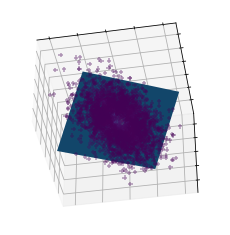

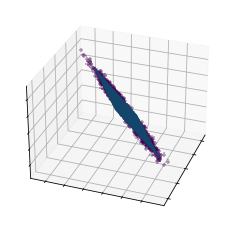

In [3]:
print(__doc__)

# Authors: Gael Varoquaux
#          Jaques Grobler
#          Kevin Hughes
# License: BSD 3 clause

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# #############################################################################
# Create the data

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x)
                  + stats.norm(scale=4 / e).pdf(x))

y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm


# #############################################################################
# Plot the figures
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    V = pca.components_.T

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()

Используя этот код, можно уменьшить размерность представления данных. Например, все планеты обращаются вокруг Солнца, находясь в одной плоскости. Из планет Солнечной системы наиболее наклонена к плоскости орбита Меркурия – до 7 угловых градусов. Будем использовать следующие данные:

\begin{array}{rrrr}
\text { Mercury } & 6.3^{\circ} & \text { Uranus } & 1.0^{\circ} \\
\text { Venus } & 2.2^{\circ} & \text { Saturn } & 0.9^{\circ} \\
\text { Mars } & 1.7^{\circ} & \text { Neptune } & 0.7^{\circ} \\
\text { Earth } & 1.6^{\circ} & \text { Jupiter } & 0.3^{\circ}
\end{array}

Пусть эта плоскость - Oxy, предположим, они вращаются все по круговым орбитам вокруг начала координат (эксцентриситеты планет малы). 
Сгенерируйте случайным образом направления плоскостей орбит с заданным наклоном, нанесите на них по 36 положений каждой планеты (равномерно по углам на орбите). После этого пересчитайте координаты всех планет, совершив поворот системы координат вокруг оси с направляющими косинусами ($1/2, 1/2, 2^{0.5}/2)$ на случайный угол. Сделать это можно умножением на матрицу поворота.

После этого визуализируйте получившиеся положения планет. С помощью SVD и выше приведенного кода постройте плоскость, в которой они все приблизительно находятся, визуализируйте это также, как в примере выше.







Для вычисления матрицы поворота будем использовать явное её выражение через параметры кватерниона. Здесь М - матрица поворота.

$$
M=\left(\begin{array}{ccc}
1-2 \cdot \lambda_y{ }^2-2 \cdot \lambda_z{ }^2 & 2 \cdot \lambda_x \cdot \lambda_y-2 \cdot \lambda_z \cdot \lambda_0 & 2 \cdot \lambda_x \cdot \lambda_z+2 \cdot \lambda_y \cdot \lambda_0 \\
2 \cdot \lambda_x \cdot \lambda_y+2 \cdot \lambda_z \cdot \lambda_0 & 1-2 \cdot \lambda_x{ }^2-2 \cdot \lambda_z{ }^2 & 2 \cdot \lambda_y \cdot \lambda_z-2 \cdot \lambda_x \cdot \lambda_0 \\
2 \cdot \lambda_x \cdot \lambda_z-2 \cdot \lambda_y \cdot \lambda_0 & 2 \cdot \lambda_y \cdot \lambda_z+2 \cdot \lambda_x \cdot \lambda_0 & 1-2 \cdot \lambda_x{ }^2-2 \cdot \lambda_y{ }^2
\end{array}\right)
$$

Коэффициенты $\lambda-$ это коэффициенты кватерниона поворота.

$$
\Lambda=\left\{\lambda_0, \lambda_x, \lambda_y, \lambda_z\right\}=\left\{\cos (\varphi / 2) ; n_x \sin (\varphi / 2) ; n_y \sin (\varphi / 2) ; n_z \sin (\varphi / 2)\right\}
$$

Где $\varphi-$ угол поворота (если отсчитывать против часовой стрелки, смотря с конца вектора оси поворота $), \vec{n}=\left(n_x ; n_y ; n_z\right)$ направляющий вектор оси поворота.

In [ ]:
def gen_orbit(theta):
    


In [1]:
def rotate(phi, nx, ny, nz):
    lambda0 = np.cos(phi/2)
    lambda1 = nx*np.sin(phi/2)
    lambda2 = ny*np.sin(phi/2)
    lambda3 = nz*np.sin(phi/2)
    
    M = np.zeros((3,3))
    M[0][0] = 1-2*lambda2**2 - 2*lambda3**2
    M[1][1] = 1-2*lambda1**2 - 2*lambda3**2
    M[2][2] = 1-2*lambda1**2 - 2*lambda2**2
    
    M[0][1] = 2*lambda1*lambda2 - 2*lambda3*lambda0
    M[1][0] = 2*lambda1*lambda2 + 2*lambda3*lambda0
    
    M[0][2] = 2*lambda1*lambda3 + 2*lambda2*lambda0
    M[2][0] = 2*lambda1*lambda3 - 2*lambda2*lambda0
    
    M[1][2] = 2*lambda2*lambda3 - 2*lambda1*lambda0
    M[2][1] = 2*lambda2*lambda3 + 2*lambda1*lambda0
    return M

## Дополнительная задача

Зафитье следующий набор точек функцией двух переменных $\check{y} = w_0*x_1^{w_1} + w_2*x_2^{w_3}$. 

Использовать метод нормального уравнения на всей выборке. Проверьте решение с помощью scipy.optimize.minimize. 

Примечание: Истинные значения $y$ заданы таблично. Иными словами, y[i, j] = y(x1[i], x2[j]). 

In [4]:
x1 = [-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ]

x2 = [-1.        , -0.89473684, -0.78947368, -0.68421053, -0.57894737,
       -0.47368421, -0.36842105, -0.26315789, -0.15789474, -0.05263158,
        0.05263158,  0.15789474,  0.26315789,  0.36842105,  0.47368421,
        0.57894737,  0.68421053,  0.78947368,  0.89473684,  1.        ]

y = [[5.9853732499711265, 5.865789866416836, 5.174284164273347, 4.9704626334631845, 4.657639648305471, 4.547807476088728, 4.271333437004503, 4.171065127484184, 3.989743896107844, 3.9880181642941674, 4.1412128234354615, 4.205388810699425, 4.053043706136275, 4.0484800558530445, 4.5134813630463, 4.740737894752851, 4.833435075060348, 5.287087879049731, 5.575225835175481, 5.989053752181049], 
     [4.629984799251969, 4.170347789512635, 4.013308832971154, 3.5727597184962576, 3.266490419298868, 3.069241256030713, 2.860939937311909, 2.810563863207954, 2.581929003656242, 2.6132544573620016, 2.516317675663247, 2.517867955366339, 2.6549957252719083, 2.76925968199568, 3.1154639630779983, 3.0535877266019016, 3.609780737715269, 3.627881425384148, 4.32425586455224, 4.458314367751673], 
     [3.4459021754882464, 3.0217036929261516, 2.814806775183466, 2.599190408614827, 2.267837300684443, 2.1031830671136706, 1.8507888926545644, 1.747606694679917, 1.5849643613259756, 1.6078448951863067, 1.5607869280389546, 1.615690019318286, 1.6030494820527992, 1.8383336258474963, 1.8125778454635848, 2.407849238337345, 2.406336693614387, 2.965044973911943, 3.115351338511461, 3.471027710981127], 
     [2.944678467547528, 2.4237195088822134, 2.2398728484903514, 1.7247978496844905, 1.4790389728710873, 1.397185420216792, 1.1662348640973283, 0.9979658623256432, 0.9647092318681304, 0.8111211719312434, 0.9506574533738573, 1.0358099345415346, 0.8623579089433392, 1.3188709450557208, 1.336892611924, 1.6201359150196746, 1.8428011671527047, 1.9847131172087424, 2.360234373115426, 2.750257362921176], 
     [2.409179877541766, 2.0899553243680566, 1.6361631352053156, 1.2852719515975073, 1.1585330694245823, 0.8038724342672983, 0.7602404955994981, 0.6498083729522274, 0.5808535174556875, 0.5357179063245509, 0.23700140268140418, 0.49120370783494305, 0.5360844080880172, 0.7682017051611828, 0.9715419358055677, 1.3007828068974883, 1.3393714445753222, 1.8085589912399036, 1.9979062983773828, 2.4684679986669873], 
     [2.124498754967762, 1.6842007562532664, 1.4226157477788341, 1.0809543969618711, 0.9425826645525162, 0.6770766398306121, 0.3296473674760744, 0.3790873926456647, -0.025457979319227997, 0.24626205619764088, 0.2517626235814633, 0.22923613452412803, 0.16598369655765305, 0.3550158913914705, 0.5937327979763163, 0.8801949444147754, 1.220895852024079, 1.4923425518436475, 1.820431818903225, 2.192042104961805], 
     [2.2466002088471115, 1.81418814785323, 1.4072319207725117, 1.3187004791578432, 0.8221716050708784, 0.6410973972324926, 0.27574203110815276, 0.07231152299807725, 0.09250172941402207, -0.16418117610676022, -0.009658715526083772, 0.005286076951955099, 0.032336882673992984, 0.35005240748427074, 0.4828410681193157, 0.4993909863513306, 0.8474727256186446, 1.0795070163718226, 1.5163272012059057, 2.2033134198708533], 
     [2.101941698614266, 1.581124598523239, 1.2375395991993754, 0.8933949767080351, 0.7580711293195369, 0.5747392626479452, 0.31071179591354636, 0.1295868338594072, 0.04140216980222425, 0.0798109812699423, -0.3156003151585534, 0.06681023217078425, 0.3098448647851055, 0.28496029623900276, 0.3886203952885403, 0.8183481048275062, 0.8880448978377765, 1.1563732376728293, 1.657155240396205, 2.0661694296556563], 
     [1.789820880322701, 1.608803295015532, 1.3394338907513252, 0.9896469975021371, 0.6938545435683916, 0.2806900372559765, 0.2968988294946614, 0.19130172013364508, 0.2575780562866172, 0.07590407851726544, -0.09429374795062387, -0.06021297372577621, -0.10792446902636754, 0.20640667046638445, 0.28320613540380335, 0.7987621791226132, 0.8655120021109977, 1.2951299648484398, 1.7576219260884953, 1.9669878906819718], 
     [2.0379791408498633, 1.6717313793026756, 1.3058244901364024, 0.9963694538518021, 0.6108675651459672, 0.5213456481654339, 0.1547432921840537, 0.09323081306532421, -0.012282804497174699, -0.08660065079490563, -0.013298368830647556, 0.03978142782681865, 0.12277585362966423, 0.12947559641866982, 0.5669063182883496, 0.663857173288938, 0.7069368251829583, 1.2466893344801981, 1.7335948153724552, 2.031450439874861], 
     [1.9549956943647415, 1.730718471989771, 1.313733294775198, 1.055946982929327, 0.6411963543484467, 0.4666754808940343, 0.38163123226654744, 0.13781293958523003, 0.08700874567520987, -0.12203305157523175, -0.17398463161934055, 0.17921231433253648, 0.24410746042842615, 0.3774327427708879, 0.38718439852544867, 0.624472970211716, 1.1586763218068092, 1.246022795079127, 1.461957318163094, 2.0060801061313027], 
     [1.9110163365525372, 1.547106970428757, 1.2672251909094177, 0.9345612160736261, 0.725644970913722, 0.681896352300388, 0.33438303755852616, 0.05471586492988802, 0.03357644878994048, -0.18891353362355295, -0.05599910302085519, 0.17505795294111504, 0.039747426865249624, 0.23465627695893537, 0.43343934036159065, 0.7108282270883126, 0.9546538388201067, 1.2074584498214807, 1.5366635488936002, 2.1406504090966743], 
     [2.0608375056981045, 1.610180457005844, 1.3920684614686432, 1.0904687894461926, 0.6494128616718499, 0.43300256606938625, 0.3180993751918205, 0.23392362659044008, 0.011090322891716797, 0.03441213451563959, 0.02187003517143347, -0.0035476805051036925, 0.013217141453099823, 0.37411899811960775, 0.4789806779382149, 0.763869817900628, 0.9222403194971188, 1.4420919120050533, 1.577742401006313, 2.0010470423918485], 
     [2.0629864284477852, 1.6447668451960482, 1.228329769088664, 1.064086798609353, 0.8087205140056317, 0.5069210848249814, 0.4033535361956612, 0.14599861904863265, 0.08482373471694994, 0.051846592785767975, 0.054273496211535335, -0.04049259412856723, 0.2709741519418001, 0.4368424704790525, 0.3756986931928347, 0.8420162159403529, 0.9524384187522594, 1.4595558181048196, 1.703201825890182, 2.0378747672212265], 
     [2.3866294847196685, 1.8483449766015185, 1.5211916853257643, 1.0637864909650965, 0.8967244828420617, 0.5783920846905054, 0.3107399324025623, 0.23044042973228718, 0.372576917242524, 0.2425880697976912, 0.2774387516387607, 0.19058861278618827, 0.3852509727833854, 0.523105980301291, 0.5536327992851725, 1.0448328707256667, 0.9733000407722328, 1.4309740945849543, 1.7389794631769562, 2.163384205681447], 
     [2.6662970013652676, 2.12811501371561, 1.6610258957976272, 1.4766770144117056, 1.21410060856051, 0.8497032077682616, 0.8306729787249585, 0.5704957321594768, 0.47883788118251225, 0.3883812009146793, 0.5551318723044026, 0.5125547907753267, 0.7671701536979616, 0.8338683655357857, 0.9520246678839908, 1.1677644583719071, 1.3093015032892115, 1.6764013688474433, 2.112509365794358, 2.484379962056315], 
     [2.906961991923785, 2.372460738525383, 2.092423468123073, 1.8447655352254178, 1.490303588513608, 1.5615763427617277, 1.1308450962171124, 1.0619136187569715, 0.9169821633895224, 0.9465447413287712, 0.8154111273672022, 1.0548348978431388, 0.9159094815995455, 1.2682022116790101, 1.3284243680962184, 1.4359565592366688, 1.831228747632959, 2.0627779572794243, 2.45431267111681, 2.821801111608159], 
     [3.466043829579495, 3.032061235832371, 2.836377368697816, 2.3499596701823378, 2.2417363950962237, 1.8422955014255855, 1.6901491323611662, 1.6476072494703622, 1.498890247621237, 1.418954249597576, 1.5975554581152966, 1.650220684786948, 1.7571927340922968, 1.757649197007955, 2.009009519432451, 2.0074428661672963, 2.587115873432171, 2.5676623833702097, 3.0163238206203804, 3.603405766978889], 
     [4.544744882812791, 4.18017713955311, 3.7841606016889986, 3.6144046758928936, 3.171678744092114, 2.9468655245845152, 2.6284408601838805, 2.78681414473015, 2.5280026937752185, 2.522264365164813, 2.643558611496271, 2.7630475563824866, 2.89346126466331, 2.990872250267641, 2.8158826002918094, 3.2249109988440625, 3.572812559637341, 3.8272421398585506, 4.167686025052573, 4.533229645556438], 
     [6.004641862284564, 5.580633462372742, 5.096571402011027, 5.038584799252717, 4.570443925602029, 4.338245088511477, 4.404642353423956, 4.101380435769967, 3.9268443577315373, 4.007159799000537, 3.8368776489119356, 4.043154796233522, 4.129085802670288, 4.356513036182671, 4.473091208261489, 4.528540515840404, 4.932478984530466, 5.268287404764767, 5.554927861605349, 5.969563191545905]]